# Read and process soil water content sensors


location of soil sensors and their numbers											
						
|Port| Sensor No | Place| depth | mTAW |
|:-----------:|:-----------:|:--------------------:|:--------------------------------:|:---------------:|
|   1   |  37   |  1 | 70 |  
|   2   |  3    |  1 | 40 |  
|   4   |  28   |  1 | 20 |  
|   5   |  41   |  2 | 70 | 
|   7   |  29   |  2 | 20 | 
|   8   |  4  |  2 | 40 | 
|   10  |  x   |  3 | x |  
|   11  |  x   |  3 | x |  
|   12  |  x   |  3 | x | 


# Import Python modules

In [2]:
import pandas as pd
import xlrd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
#from pandasql import sqldf
import datetime
import csv
import pdb
from tqdm.notebook import tqdm
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
from matplotlib.legend import Legend
def minor_formatter(x, ind):
    # only format if we don't overlap with a major tick
    if np.mod(x, 1) < .1:
        return ''
    return '{:.1f}'.format(np.mod(x, 1))
def alternate_formatter(x, ind):
    rm = np.mod(x, 1)
    if np.abs(rm) < .1:
        return '{:d}'.format(int(x))
    return '{:.1f}'.format(rm)

# Read data file

In [3]:
path1 = os.getcwd()
path = os.path.join(path1, 'Data_Callibration')
file = os.path.join(path, 'RawData.csv')
Cal = pd.read_csv(file,sep=';', header=0)
print(Cal)

    SensorNumber   RawValue  KnownVWC  Unnamed: 3
0              7  27.192825     0.353         NaN
1              7  25.560288     0.254         NaN
2              7  23.913115     0.209         NaN
3             28  27.711502     0.353         NaN
4             28  26.337332     0.254         NaN
5             28  24.516957     0.209         NaN
6             41  28.118244     0.353         NaN
7             41  26.337332     0.254         NaN
8             41  24.753454     0.209         NaN
9             43  27.192825     0.353         NaN
10            43  25.218349     0.254         NaN
11            43  23.913115     0.209         NaN
12             3  28.418761     0.353         NaN
13             3  26.337332     0.254         NaN
14             3  25.446928     0.209         NaN
15            29  28.418761     0.353         NaN
16            29  25.673040     0.254         NaN
17            29  24.635553     0.209         NaN
18             4  28.617026     0.353         NaN


In [4]:
path2 = os.getcwd()
path = os.path.join(path2, 'Data_Callibration')
file = os.path.join(path, 'WeatherData.csv')

#climate data from  www.dacom.nl
clim=pd.read_csv(file,sep=';', parse_dates=[['date','time']],dayfirst=True)
#clim['date_time']=pd.to_datetime(clim['date_time'], unit='s')
clim2=clim.set_index('date_time')
climdaily=clim2.resample('D').agg({'precipitation': np.sum})#, 'air_temperature': np.mean,'rel_humidity': np.mean})
#climdaily.reset_index().plot(kind='scatter', x='date_time', y='precipitation')

print(climdaily)
climdaily.to_excel('saved_climfile.xlsx')


            precipitation
date_time                
2022-01-10            7.8
2022-01-11            3.0
2022-01-12            0.0
2022-01-13            0.0
2022-01-14            0.0
...                   ...
2022-12-06            0.0
2022-12-07            0.0
2022-12-08            0.0
2022-12-09            0.0
2022-12-10            0.0

[335 rows x 1 columns]


# Plot data

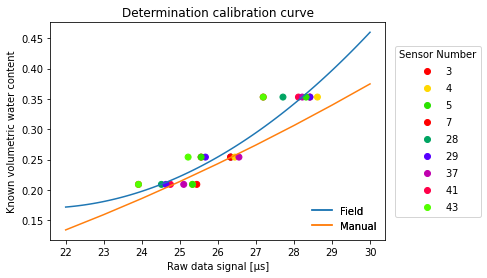

          2
0.003844 x - 0.1638 x + 1.916
0.8835858446749271


In [5]:
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.stats as stats

x = Cal.RawValue
y = Cal.KnownVWC
colors = Cal.SensorNumber
xx = np.arange(22,31)
yy = 0.0007*xx**2 - 0.0063*xx - 0.0663


model = np.poly1d(np.polyfit(Cal['RawValue'],
                             Cal['KnownVWC'], 2))
polyline = np.linspace(22, 30, 100)
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=colors, cmap='prism')
legend = ax.legend(*scatter.legend_elements(), bbox_to_anchor = (1.30, 0.5), loc='center right', title="Sensor Number")
ax.add_artist(legend)
ax.set_ylabel('Known volumetric water content')
ax.set_xlabel('Raw data signal [µs]')
ax.set_title('Determination calibration curve')



field, = plt.plot(polyline, model(polyline))
manual, = plt.plot(xx,yy)


leg = ax.legend( handles = [field, manual], labels = ['Field', 'Manual'],
               loc='lower right', frameon=False)
ax.add_artist(leg);

plt.show()

  
print(model)
print(r2_score(Cal['KnownVWC'], 
               model(Cal['RawValue'])))
  

# Import field data

In [44]:
path1 = os.getcwd()
path = os.path.join(path1, 'Data_Callibration')
file = os.path.join(path, 'FieldData2.csv')
Field = pd.read_csv(file,sep=';', header=0)
Field1 = Field.iloc[:,0:38]
Data = Field1.iloc[:,[5,7,9,11,13,15,17,19,21,23,27,29,33,35,37]]
Data = Data.replace('NAN',np.nan)
Data = Data.fillna(0)
Data = Data.astype(float)
#Data['PA_uS_Avg(7)'] = Data['PA_uS_Avg(7)'] + Data['PA_uS_Avg(3)']
#Data['PA_uS_Avg(8)'] = Data['PA_uS_Avg(8)'] + Data['PA_uS_Avg(6)']
#Data.loc[:40,'PA_uS_Avg(3)'] = 0
#Data.loc[:40,'PA_uS_Avg(6)'] = 0
print(Data)
Data.to_excel('RawSignals.xlsx')


      PA_uS_Avg(1)  PA_uS_Avg(2)  PA_uS_Avg(3)  PA_uS_Avg(4)  PA_uS_Avg(5)  \
0            26.74         24.24           0.0          0.00          0.00   
1            27.16         26.50           0.0         25.39         25.83   
2            27.17         26.50           0.0         25.40         25.84   
3            27.18         26.50           0.0         25.40         25.84   
4            27.18         26.51           0.0         25.41         25.85   
...            ...           ...           ...           ...           ...   
2738         29.95         27.21           0.0         26.88         30.64   
2739         29.95         27.21           0.0         26.88         30.65   
2740         29.95         27.21           0.0         26.88         30.65   
2741         29.95         27.21           0.0         26.88         30.65   
2742         29.95         27.21           0.0         26.88         30.65   

      PA_uS_Avg(6)  PA_uS_Avg(7)  PA_uS_Avg(8)  PA_uS_Avg(9)  P

FileCreateError: [Errno 13] Permission denied: 'RawSignals.xlsx'

# Calculate volumetric water content

In [45]:
c=len(Data.columns) 
print(c)
r=len(Data)
print(r)
ColumnNumber = list(range(0, c))
print(ColumnNumber)
VWC = np.zeros((r,c))
print(VWC)

15
2743
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
for i in ColumnNumber:
    VWC[:,i] = 0.003844*Data.iloc[:,i]**2 - 0.1638*Data.iloc[:,i] + 1.916
print(VWC)

[[0.28455409 0.20413629 1.916      ... 1.916      1.916      1.916     ]
 [0.30277857 0.274749   1.916      ... 1.916      1.916      1.916     ]
 [0.30322901 0.274749   1.916      ... 1.916      1.916      1.916     ]
 ...
 [0.45826761 0.30503848 1.916      ... 1.916      0.59034225 0.5375198 ]
 [0.45826761 0.30503848 1.916      ... 1.916      0.58953969 0.5375198 ]
 [0.45826761 0.30503848 1.916      ... 1.916      0.58953969 0.5375198 ]]


In [47]:
VWC[VWC>1] = np.nan
print(VWC)

[[0.28455409 0.20413629        nan ...        nan        nan        nan]
 [0.30277857 0.274749          nan ...        nan        nan        nan]
 [0.30322901 0.274749          nan ...        nan        nan        nan]
 ...
 [0.45826761 0.30503848        nan ...        nan 0.59034225 0.5375198 ]
 [0.45826761 0.30503848        nan ...        nan 0.58953969 0.5375198 ]
 [0.45826761 0.30503848        nan ...        nan 0.58953969 0.5375198 ]]


In [48]:
VWC = pd.DataFrame(VWC)
VWC.columns =['a70','a40','d20/1','a20','b70','d40/1','b20','b40','d70/1','d20/2','d20/3','d40/3','d40/2','d70/3','d70/2']
print(VWC)

           a70       a40  d20/1       a20       b70  d40/1       b20  \
0     0.284554  0.204136    NaN       NaN       NaN    NaN  0.182871   
1     0.302779  0.274749    NaN  0.235161  0.249720    NaN  0.238339   
2     0.303229  0.274749    NaN  0.235475  0.250068    NaN  0.238661   
3     0.303680  0.274749    NaN  0.235475  0.250068    NaN  0.238661   
4     0.303680  0.275149    NaN  0.235790  0.250417    NaN  0.238984   
...        ...       ...    ...       ...       ...    ...       ...   
2738  0.458268  0.305038    NaN  0.290478  0.505952    NaN  0.284972   
2739  0.458268  0.305038    NaN  0.290478  0.506670    NaN  0.284972   
2740  0.458268  0.305038    NaN  0.290478  0.506670    NaN  0.284972   
2741  0.458268  0.305038    NaN  0.290478  0.506670    NaN  0.284972   
2742  0.458268  0.305038    NaN  0.290478  0.506670    NaN  0.285391   

           b40  d70/1     d20/2  d20/3     d40/3  d40/2     d70/3     d70/2  
0          NaN    NaN       NaN    NaN       NaN    NaN  

In [49]:
Plotdata = Field1.iloc[:,0]
print(Plotdata)

0       2022-09-20 14:00:00
1       2022-09-20 14:30:00
2       2022-09-20 15:00:00
3       2022-09-20 15:30:00
4       2022-09-20 16:00:00
               ...         
2738    2022-11-16 15:00:00
2739    2022-11-16 15:30:00
2740    2022-11-16 16:00:00
2741    2022-11-16 16:30:00
2742    2022-11-16 17:00:00
Name: TIMESTAMP, Length: 2743, dtype: object


In [50]:
Plotdata = pd.concat([Plotdata, VWC], axis="columns")
print(Plotdata)


                TIMESTAMP       a70       a40  d20/1       a20       b70  \
0     2022-09-20 14:00:00  0.284554  0.204136    NaN       NaN       NaN   
1     2022-09-20 14:30:00  0.302779  0.274749    NaN  0.235161  0.249720   
2     2022-09-20 15:00:00  0.303229  0.274749    NaN  0.235475  0.250068   
3     2022-09-20 15:30:00  0.303680  0.274749    NaN  0.235475  0.250068   
4     2022-09-20 16:00:00  0.303680  0.275149    NaN  0.235790  0.250417   
...                   ...       ...       ...    ...       ...       ...   
2738  2022-11-16 15:00:00  0.458268  0.305038    NaN  0.290478  0.505952   
2739  2022-11-16 15:30:00  0.458268  0.305038    NaN  0.290478  0.506670   
2740  2022-11-16 16:00:00  0.458268  0.305038    NaN  0.290478  0.506670   
2741  2022-11-16 16:30:00  0.458268  0.305038    NaN  0.290478  0.506670   
2742  2022-11-16 17:00:00  0.458268  0.305038    NaN  0.290478  0.506670   

      d40/1       b20       b40  d70/1     d20/2  d20/3     d40/3  d40/2  \
0       NaN

In [51]:
Plotdata1 = Plotdata.drop(Plotdata.index[0:137])
print(Plotdata1)

                TIMESTAMP       a70       a40  d20/1       a20       b70  \
137   2022-09-23 10:30:00  0.309616  0.240283    NaN  0.244589  0.479927   
138   2022-09-23 11:00:00  0.310541  0.240283    NaN  0.244589  0.481307   
139   2022-09-23 11:30:00  0.309616  0.239957    NaN  0.243584  0.481307   
140   2022-09-23 12:00:00  0.309155  0.240283    NaN  0.242918  0.481307   
141   2022-09-23 12:30:00  0.309155  0.240609    NaN  0.243251  0.481998   
...                   ...       ...       ...    ...       ...       ...   
2738  2022-11-16 15:00:00  0.458268  0.305038    NaN  0.290478  0.505952   
2739  2022-11-16 15:30:00  0.458268  0.305038    NaN  0.290478  0.506670   
2740  2022-11-16 16:00:00  0.458268  0.305038    NaN  0.290478  0.506670   
2741  2022-11-16 16:30:00  0.458268  0.305038    NaN  0.290478  0.506670   
2742  2022-11-16 17:00:00  0.458268  0.305038    NaN  0.290478  0.506670   

      d40/1       b20       b40  d70/1     d20/2  d20/3     d40/3  d40/2  \
137     NaN

In [52]:
Timestamp = Plotdata1['TIMESTAMP']
Timestamp = pd.to_datetime(Timestamp)
a70 = Plotdata1['a70']
a40 = Plotdata1['a40']
a20 = Plotdata1['a20']
b70 = Plotdata1['b70']
b20 = Plotdata1['b20']
b40 = Plotdata1['b40']
d20w1 = Plotdata1['d20/1']
d40w1 = Plotdata1['d40/1']
d70w1 = Plotdata1['d70/1']
d20w2 = Plotdata1['d20/2']
d20w3 = Plotdata1['d20/3']
d40w3 = Plotdata1['d40/3']
d40w2 = Plotdata1['d40/2']
d70w3 = Plotdata1['d70/3']
d70w2 = Plotdata1['d70/2']
print(Timestamp)

137    2022-09-23 10:30:00
138    2022-09-23 11:00:00
139    2022-09-23 11:30:00
140    2022-09-23 12:00:00
141    2022-09-23 12:30:00
               ...        
2738   2022-11-16 15:00:00
2739   2022-11-16 15:30:00
2740   2022-11-16 16:00:00
2741   2022-11-16 16:30:00
2742   2022-11-16 17:00:00
Name: TIMESTAMP, Length: 2606, dtype: datetime64[ns]


(738421.0, 738476.0)

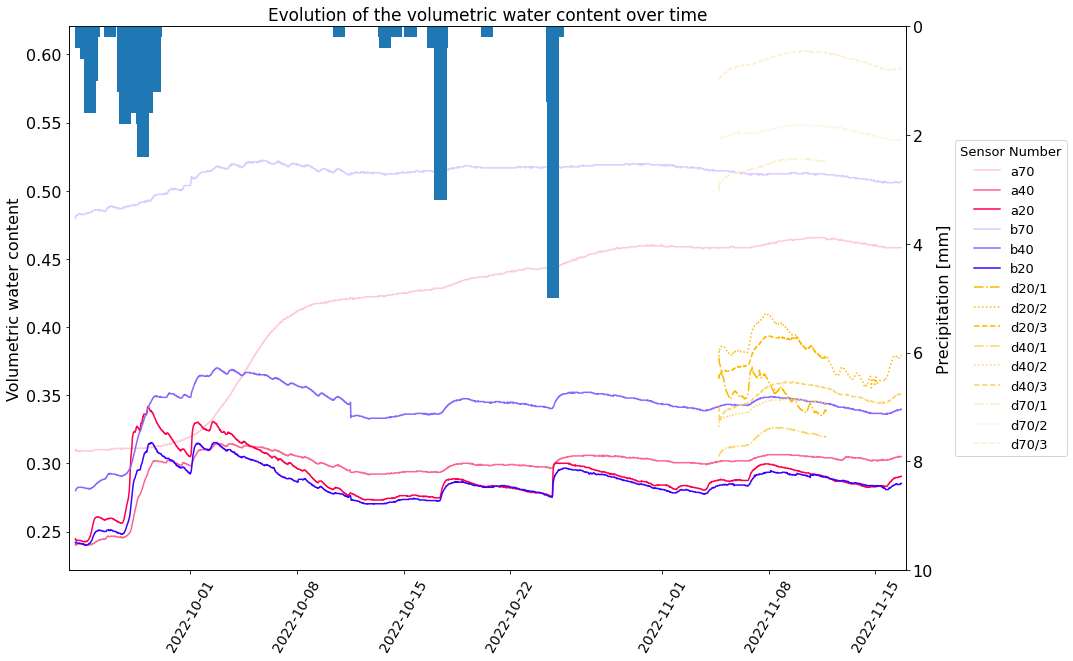

In [54]:
date1=datetime.date(2022,9,23)
date2=datetime.date(2022,11,17)
ftsz=16

fig, ax= plt.subplots(figsize=(15,10))
axb=ax.twinx()

ax.plot(Timestamp, a70, label='a70', color='#fccad8')
ax.plot(Timestamp, a40, label='a40', color='#fc6590')
ax.plot(Timestamp, a20, label='a20', color='#fc0048')
ax.plot(Timestamp, b70, label='b70', color='#d8ccff')
ax.plot(Timestamp, b40, label='b40', color ='#8a66ff')
ax.plot(Timestamp, b20, label='b20', color='#3c00ff')

ax.plot(Timestamp, d20w1, label='d20/1', color='#fcb900', linestyle = 'dashdot')
ax.plot(Timestamp, d20w2, label='d20/2', color='#fcb900', linestyle = 'dotted')
ax.plot(Timestamp, d20w3, label='d20/3', color='#fcb900', linestyle = 'dashed')

ax.plot(Timestamp, d40w1, label='d40/1', color='#fcd465', linestyle = 'dashdot')
ax.plot(Timestamp, d40w2, label='d40/2', color='#fcd465', linestyle = 'dotted')
ax.plot(Timestamp, d40w3, label='d40/3', color='#fcd465', linestyle = 'dashed')

ax.plot(Timestamp, d70w1, label='d70/1', color='#fcefca', linestyle = 'dashdot')
ax.plot(Timestamp, d70w2, label='d70/2', color='#fcefca', linestyle = 'dotted')
ax.plot(Timestamp, d70w3, label='d70/3', color='#fcefca', linestyle = 'dashed')

ax.set_title('Evolution of the volumetric water content over time', fontsize = ftsz+1)
ax.legend(title='Sensor Number',title_fontsize = ftsz-3, bbox_to_anchor = (1.20, 0.5), loc='center right', fontsize=ftsz-3)
ax.set_ylabel('Volumetric water content', fontsize= ftsz)
ax.tick_params(axis='x', which='both', labelsize=ftsz-2,rotation=60)
ax.tick_params(axis='y', which='both', labelsize=ftsz)
axb.bar(clim['date_time'],clim.precipitation)
axb.set_ylim([0, 10])
axb.invert_yaxis()
axb.set_ylabel('Precipitation [mm]', fontsize= ftsz)
axb.tick_params(axis='x', which='both', labelsize=ftsz)
axb.tick_params(axis='y', which='both', labelsize=ftsz)

axb.set_xlim([date1,date2])

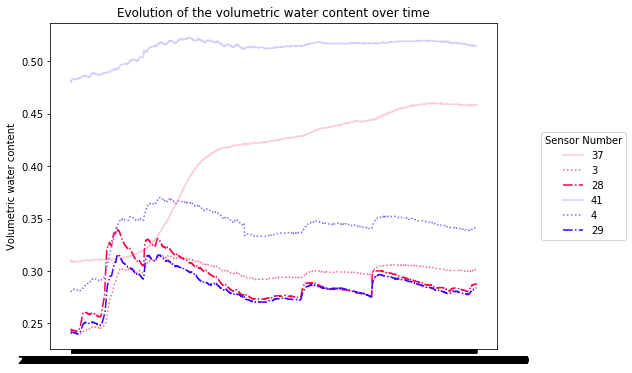

In [18]:

plt.figure(figsize=(8,6))
plt.plot(Timestamp, s37, label='37', color='#fccad8')
plt.plot(Timestamp, s3, label='3', color='#fc6590', linestyle = 'dotted')
plt.plot(Timestamp, s28, label='28', color='#fc0048', linestyle = 'dashdot')
plt.plot(Timestamp, s41, label='41', color='#d8ccff')
plt.plot(Timestamp, s4, label='4', color ='#8a66ff', linestyle = 'dotted')
plt.plot(Timestamp, s29, label='29', color='#3c00ff', linestyle = 'dashdot')
plt.title('Evolution of the volumetric water content over time')
plt.ylabel('Volumetric water content')
plt.xlabel('')
plt.legend(title='Sensor Number', bbox_to_anchor = (1.30, 0.5), loc='center right')


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

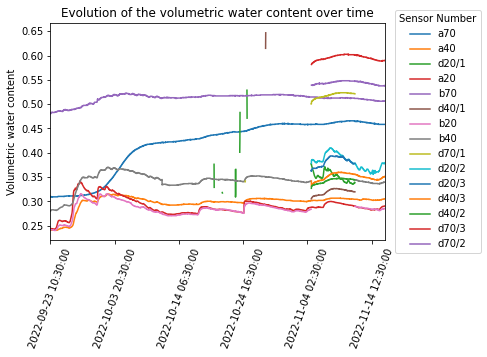

In [30]:
Plotdata1.plot(x='TIMESTAMP')
plt.title('Evolution of the volumetric water content over time')
plt.ylabel('Volumetric water content')
plt.xlabel('')
plt.legend(title='Sensor Number', bbox_to_anchor = (1.30, 0.5), loc='center right')
plt.xticks(rotation = 70)

In [20]:
plt.plot(Timestamp, s37, label='37', color='#fccad8')
axb.bar(clim['date_time'],clim.precipitation)
print(Timestamp)
print(clim['date_time'])

NameError: name 's37' is not defined